<a href="https://colab.research.google.com/github/Shubhangidharmik/Appliances-energy-prediction/blob/main/Shubhangi_Dharmik_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPLIANCES ENERGY PREDICTION**

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/ACCESS DATA/Copy of data_application_energy.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-18 15:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


Date time year-month-day hour:minute:

Appliances, energy use in Wh (Dependent variable)

Lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius 

RH2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius 

RH4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in 

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius 

RH8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), 

in Celsius Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), 

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

# **Data cleaning**

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [10]:
features =['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']

**No Null values are there**

# **Exploratory Data Analysis**

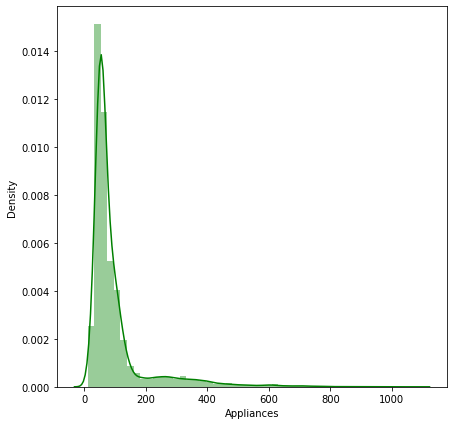

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(df['Appliances'],color="g")

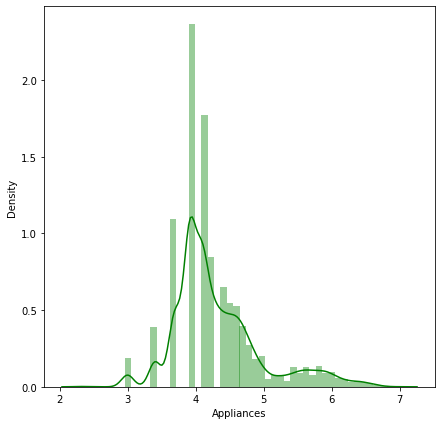

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['Appliances']),color="g")

In [ ]:
numeric_features=['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']

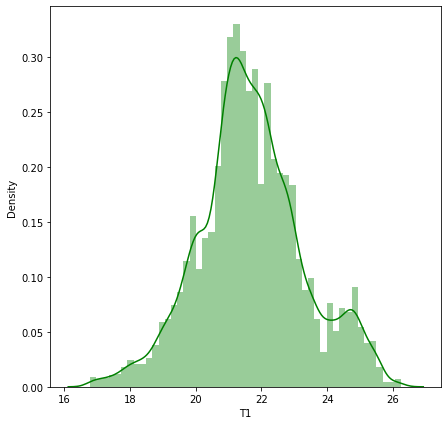

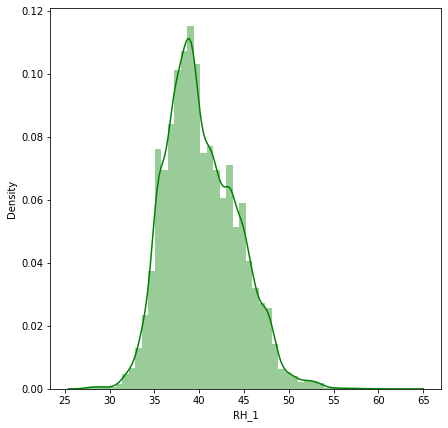

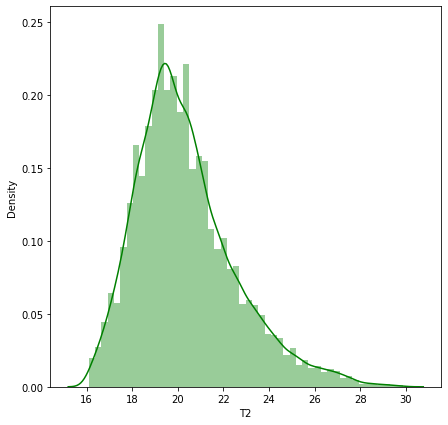

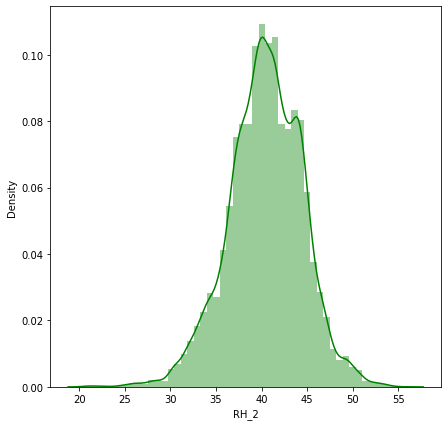

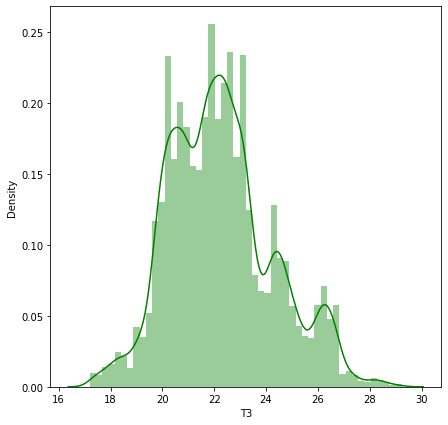

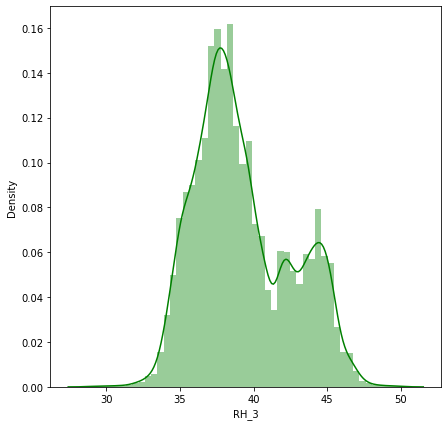

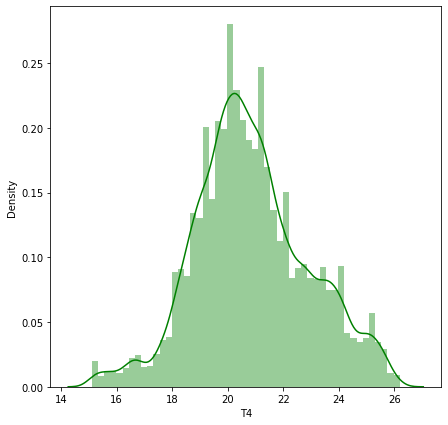

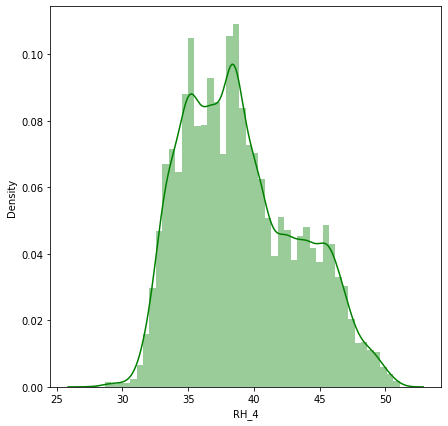

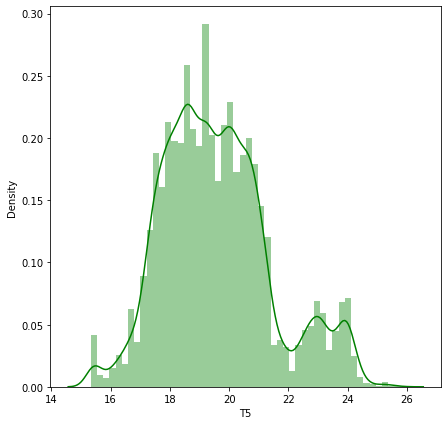

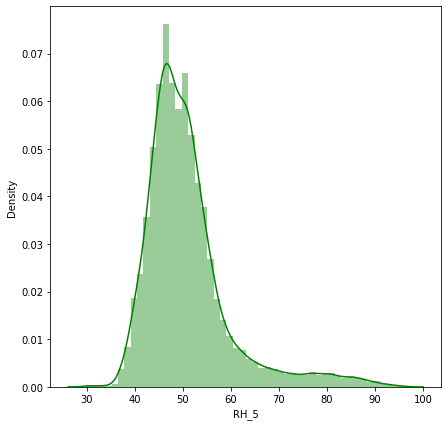

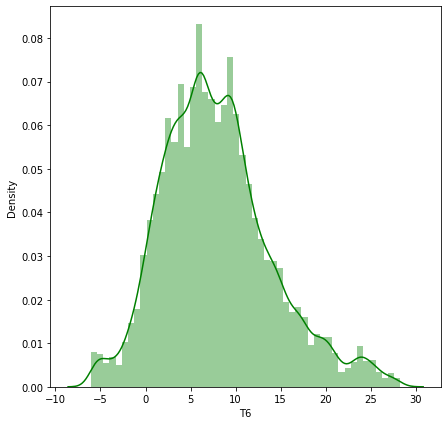

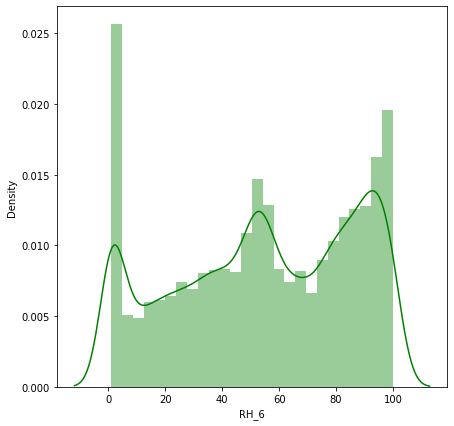

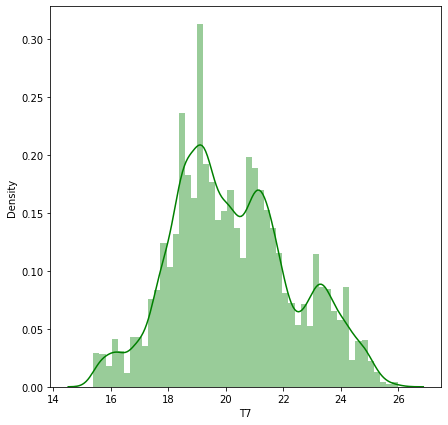

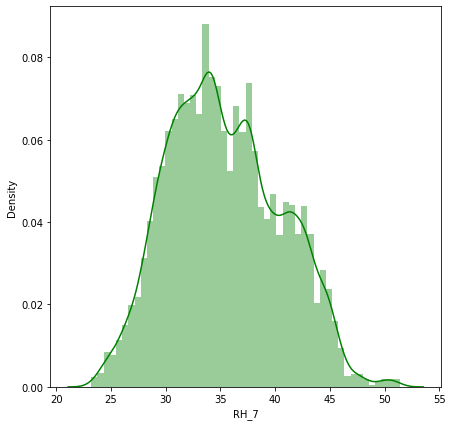

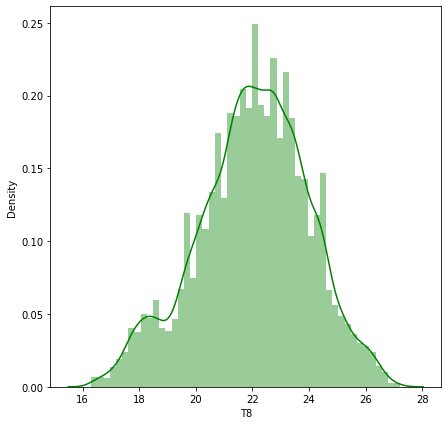

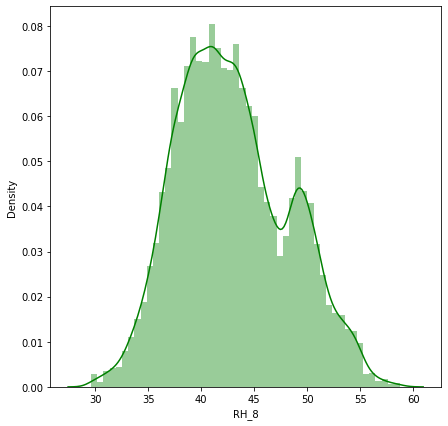

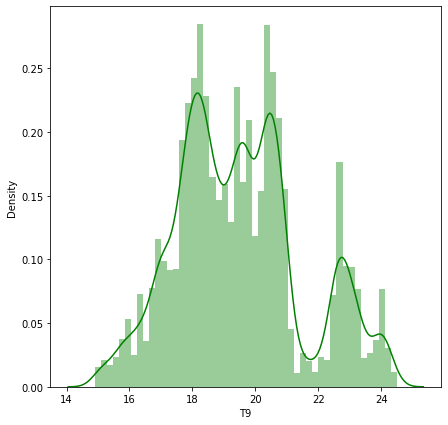

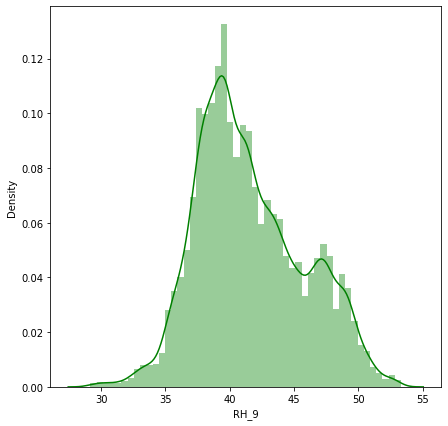

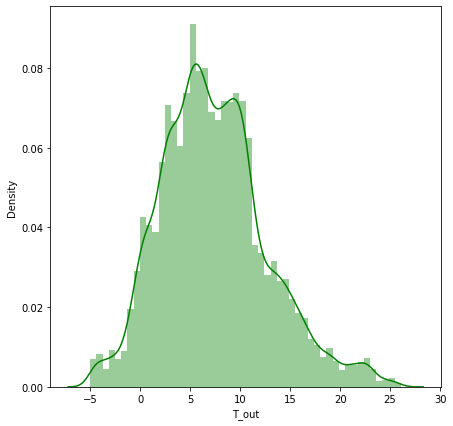

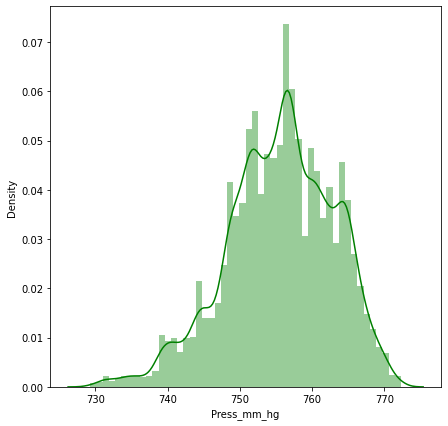

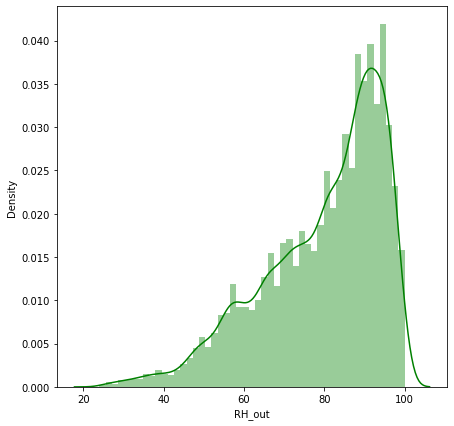

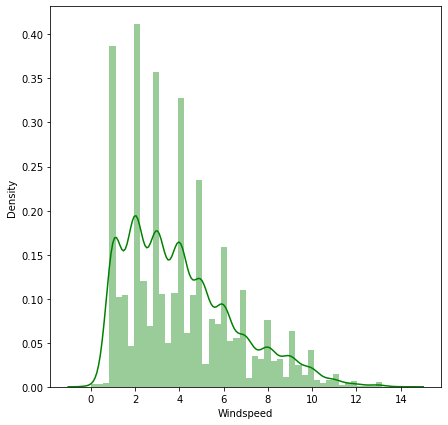

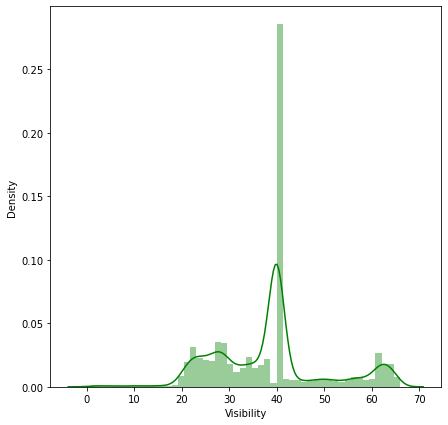

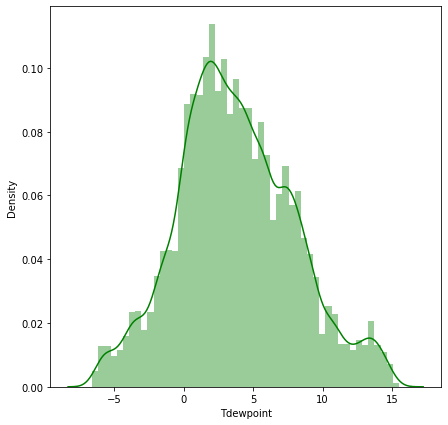

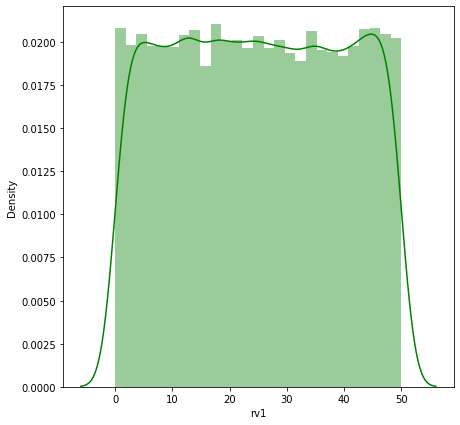

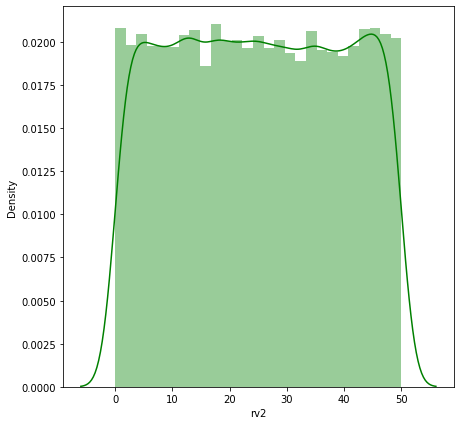

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['T1'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_1'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T2'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_2'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T3'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_3'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T4'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_4'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T5'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_5'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T6'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_6'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T7'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_7'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T8'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_8'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T9'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_9'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['T_out'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['Press_mm_hg'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['RH_out'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['Windspeed'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['Visibility'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['Tdewpoint'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['rv1'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['rv2'],color="g")


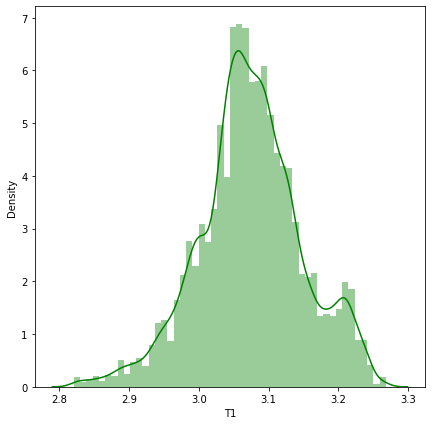

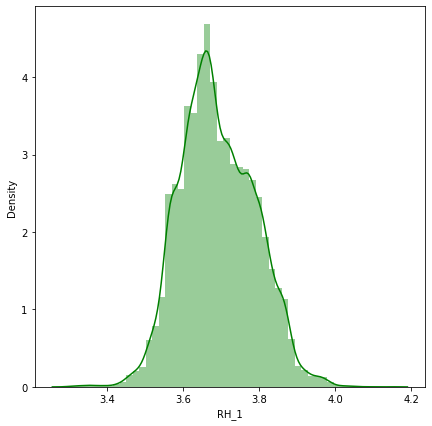

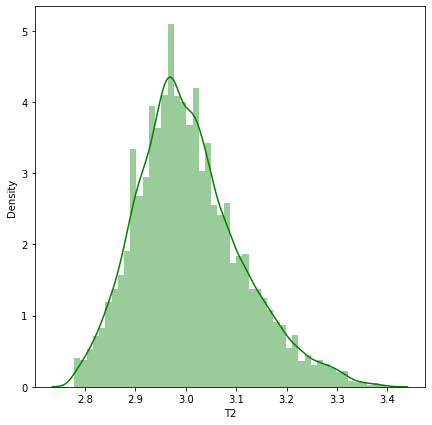

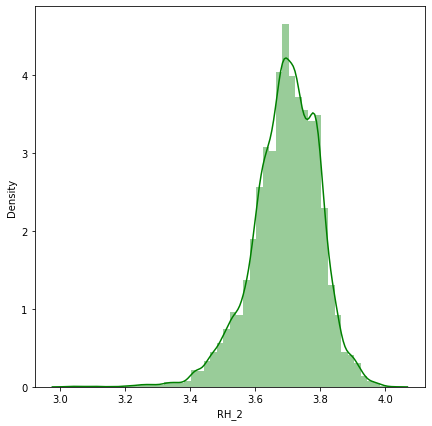

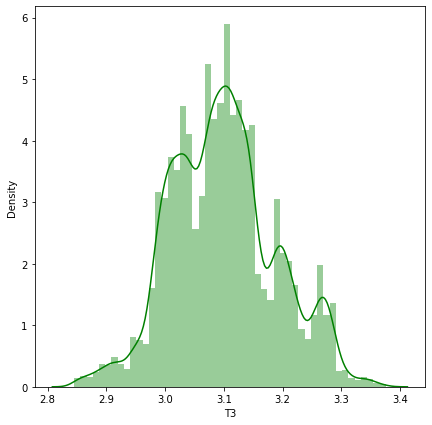

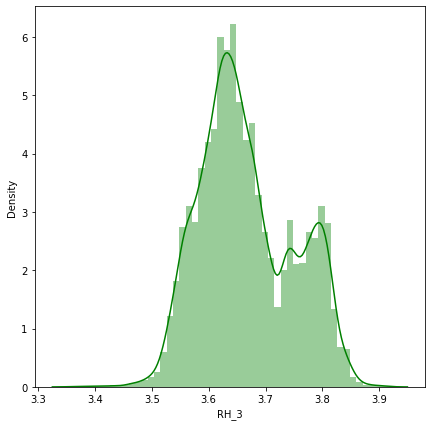

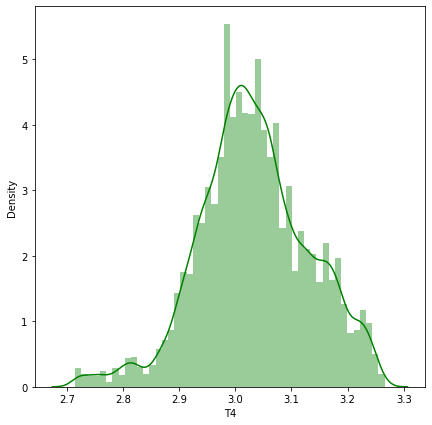

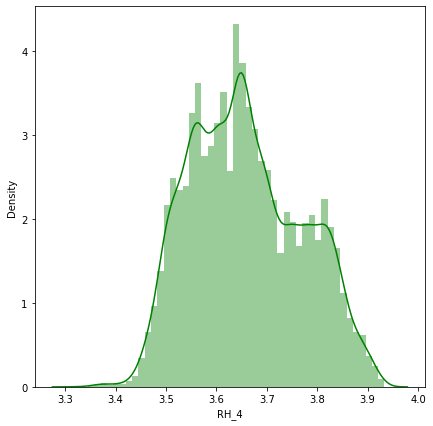

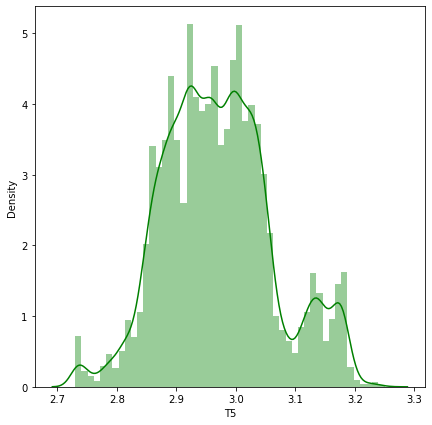

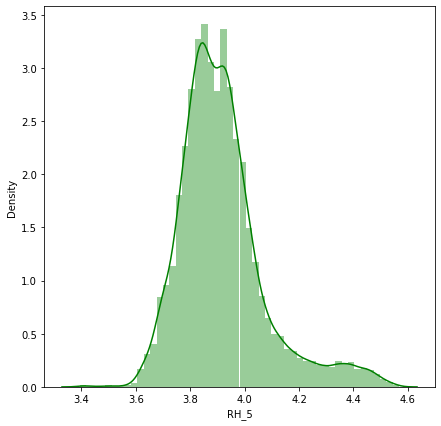

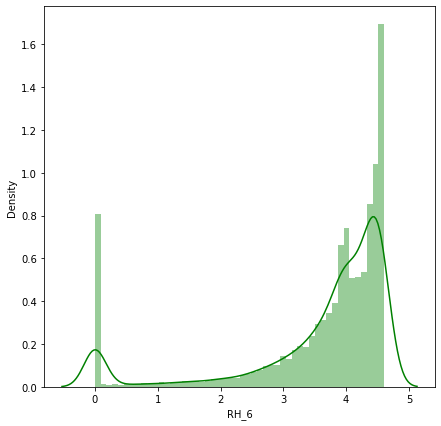

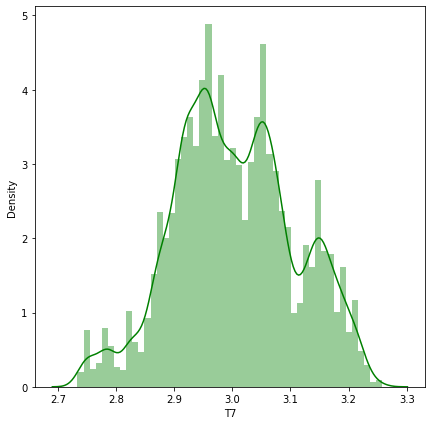

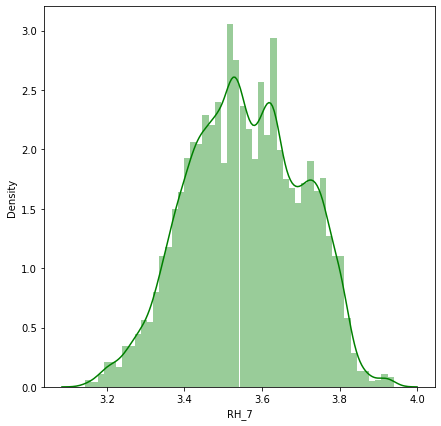

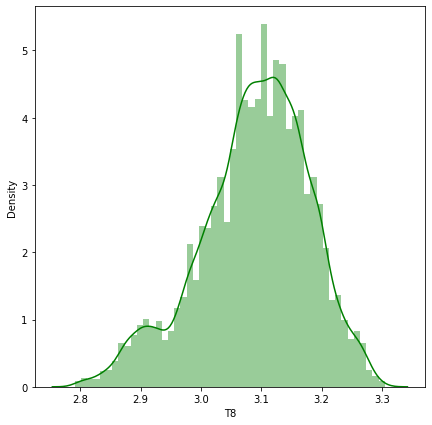

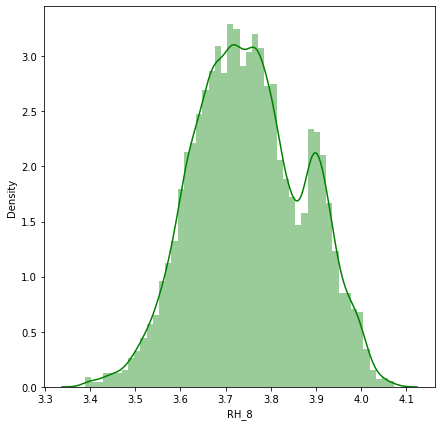

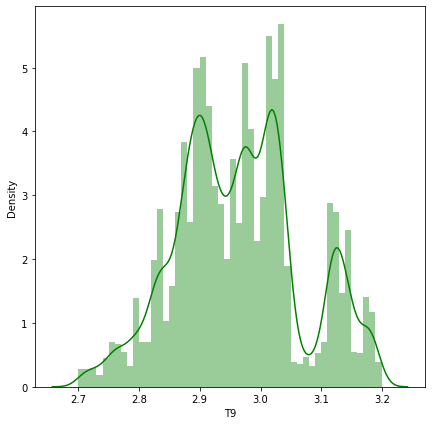

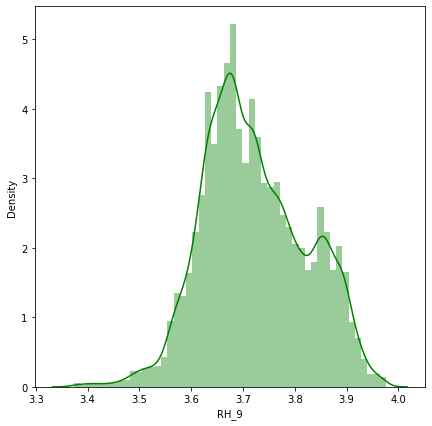

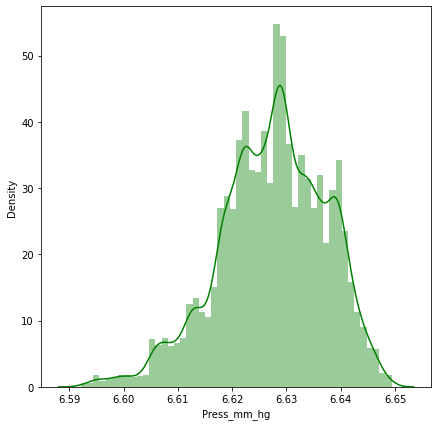

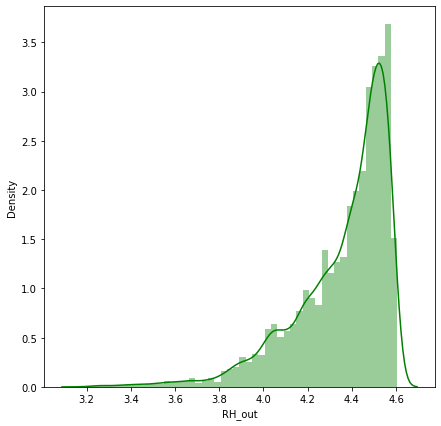

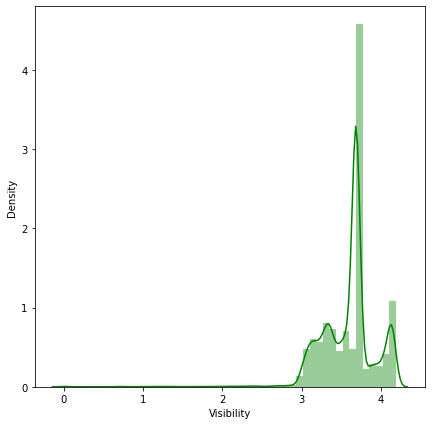

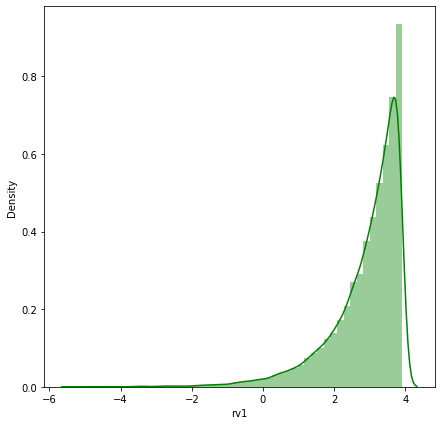

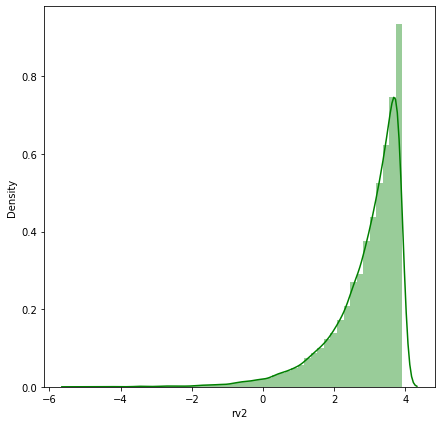

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T1']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_1']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T2']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_2']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T3']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_3']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T4']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_4']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T5']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_5']),color="g")

#plt.figure(figsize=(7,7))
#sns.distplot(np.log(df['T6']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_6']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T7']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_7']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T8']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_8']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['T9']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_9']),color="g")

#plt.figure(figsize=(7,7))
#sns.distplot(np.log(df['T_out']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['Press_mm_hg']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['RH_out']),color="g")

#plt.figure(figsize=(7,7))
#sns.distplot(np.log(df['Windspeed']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['Visibility']),color="g")

#plt.figure(figsize=(7,7))
#sns.distplot(np.log(df['Tdewpoint']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['rv1']),color="g")

plt.figure(figsize=(7,7))
sns.distplot(np.log(df['rv2']),color="g")

In [ ]:
numeric_features= df.describe().columns
numeric_features

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

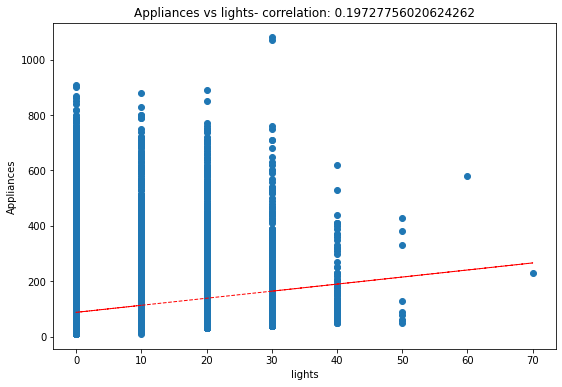

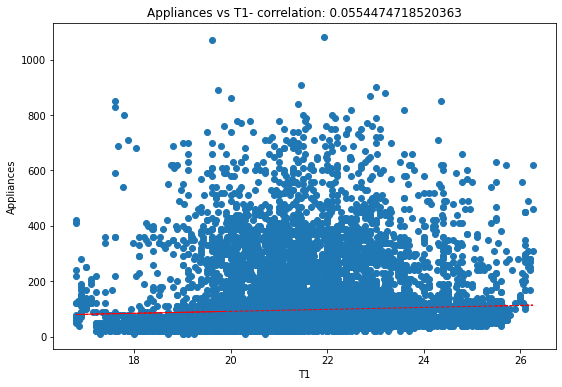

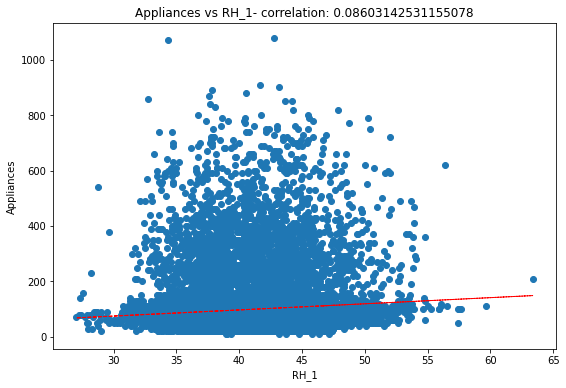

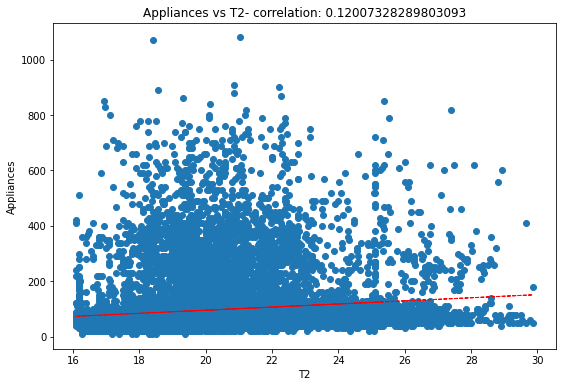

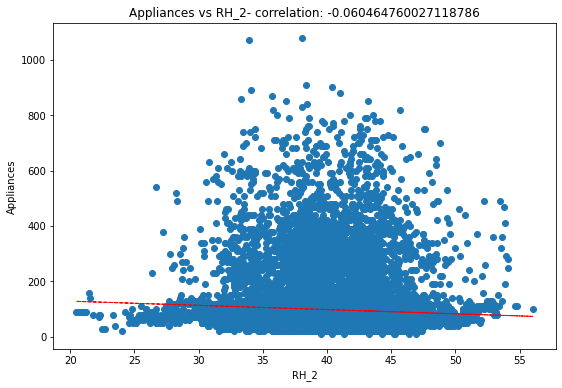

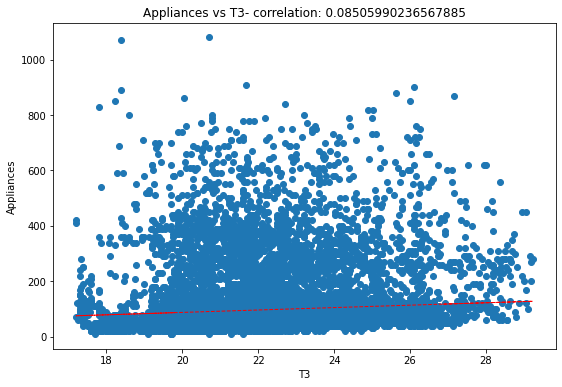

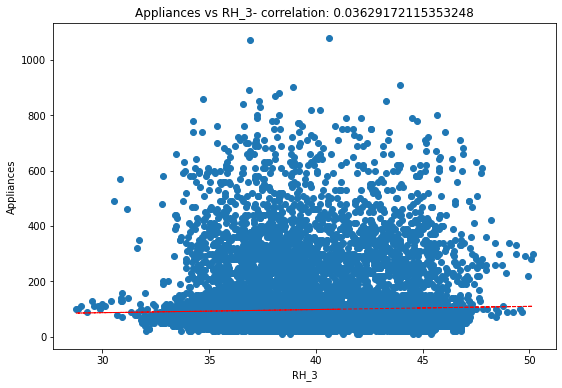

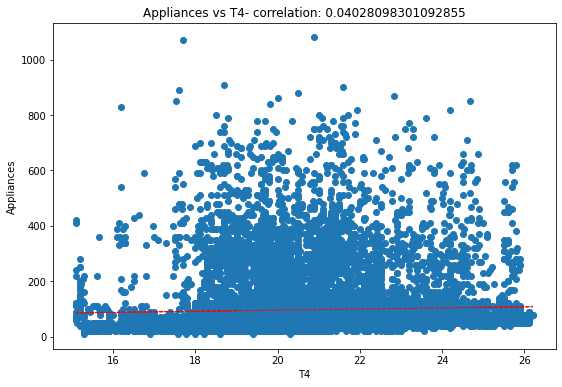

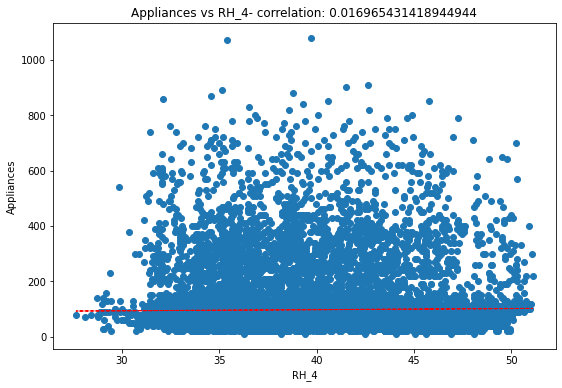

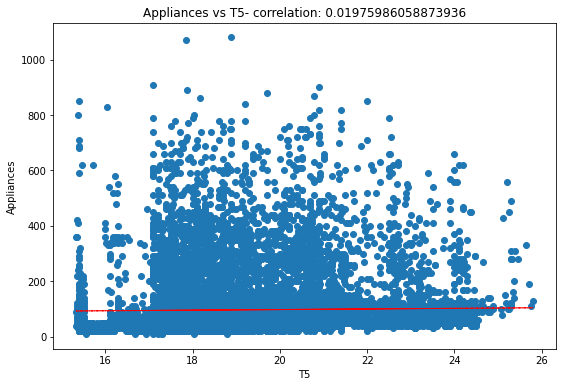

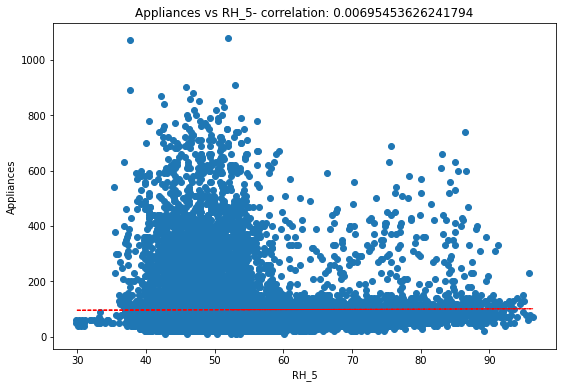

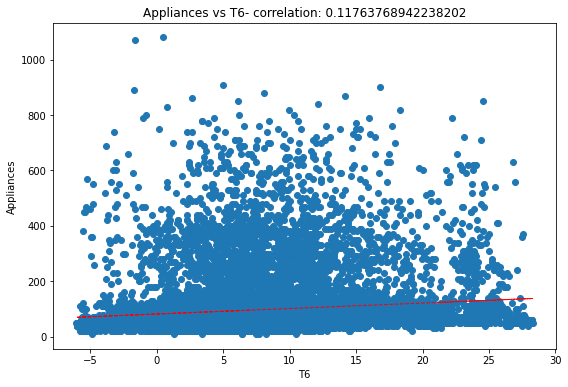

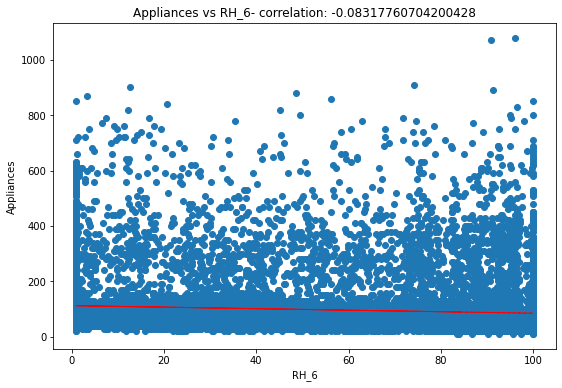

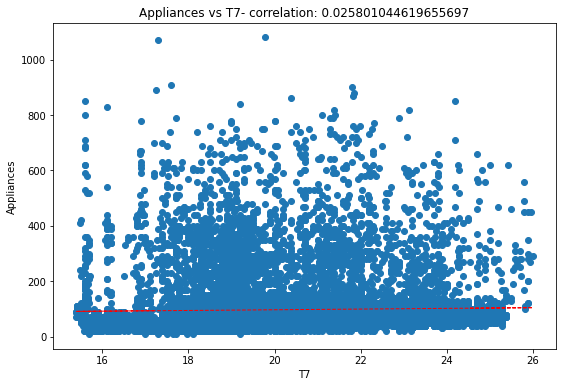

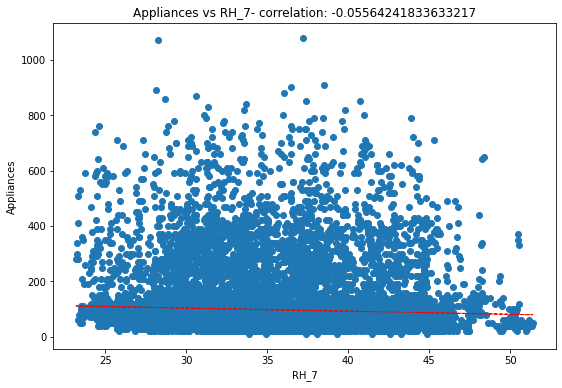

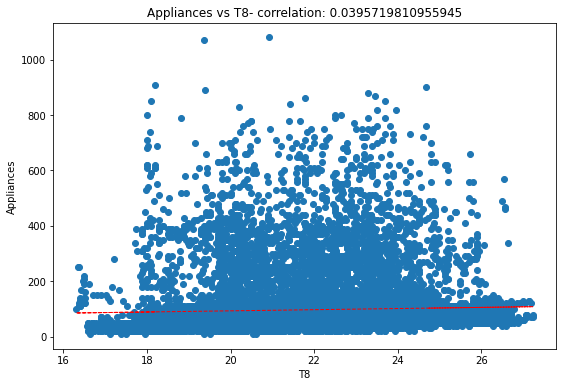

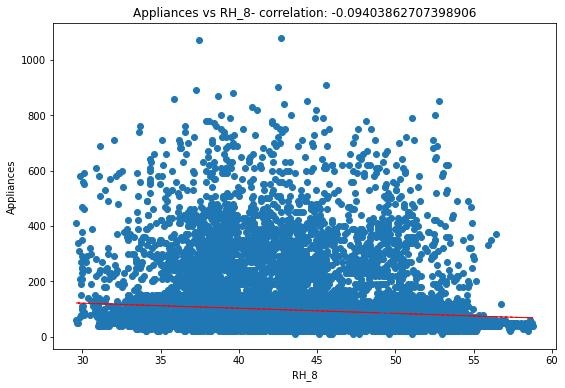

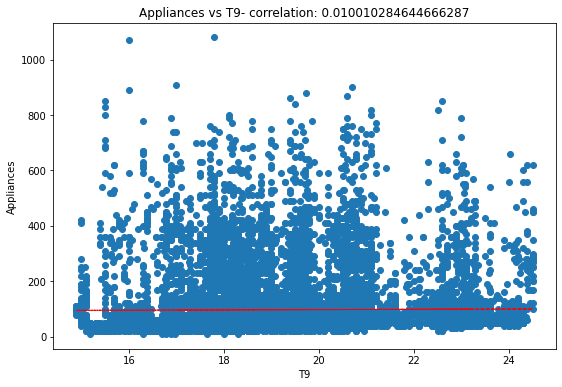

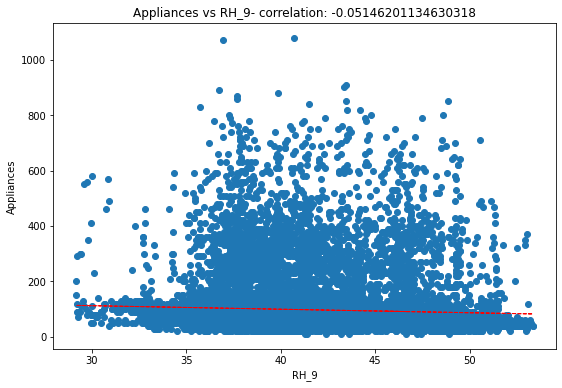

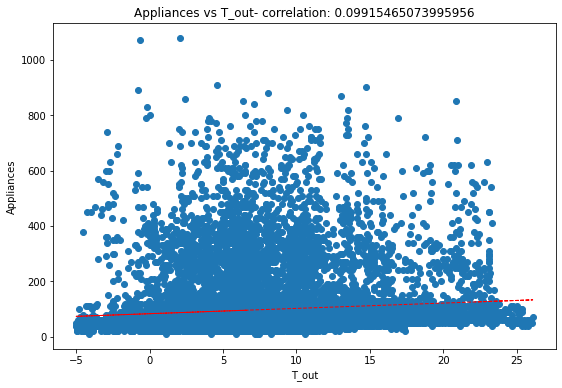

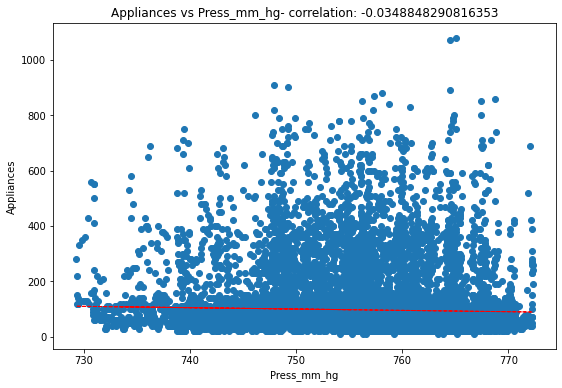

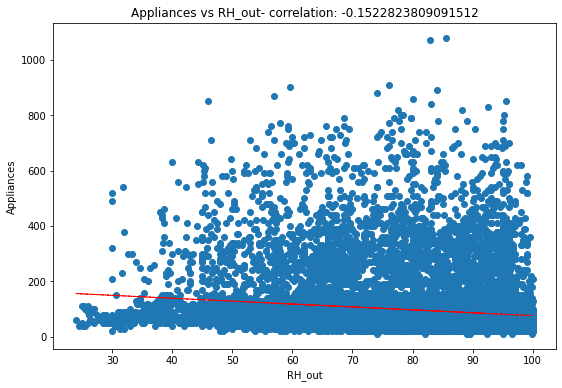

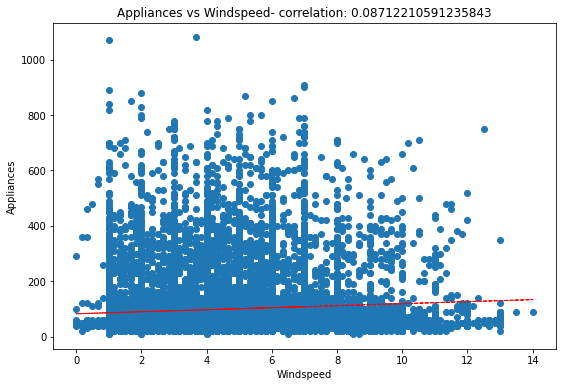

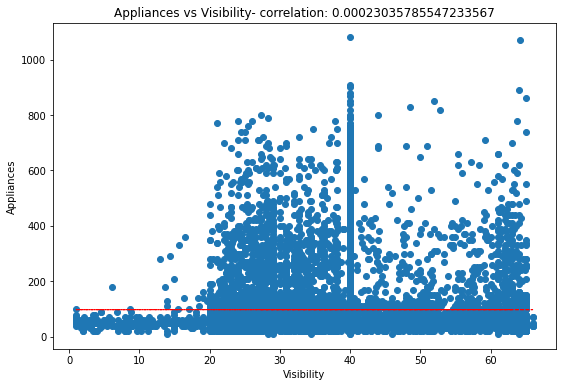

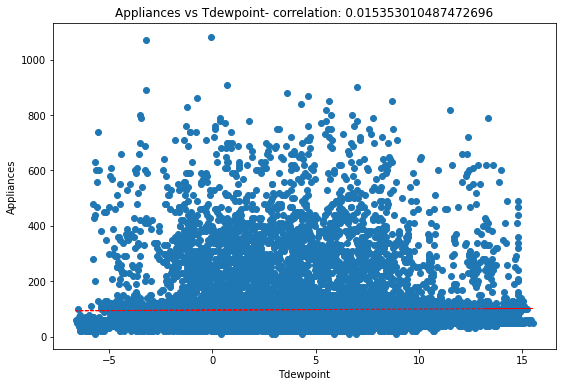

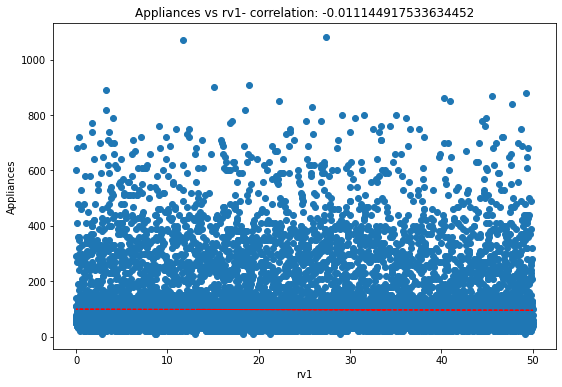

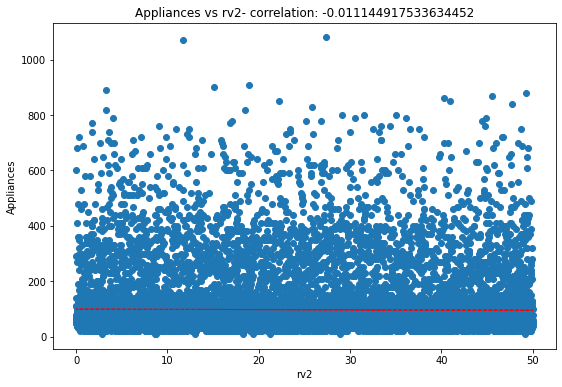

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

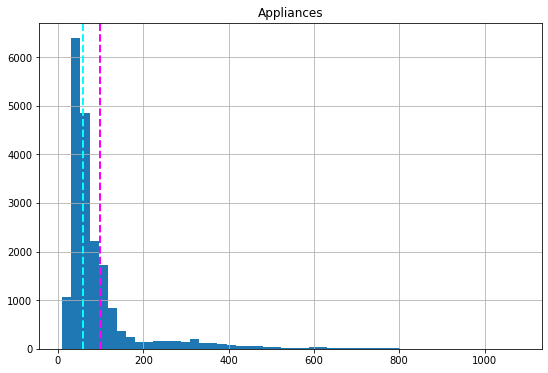

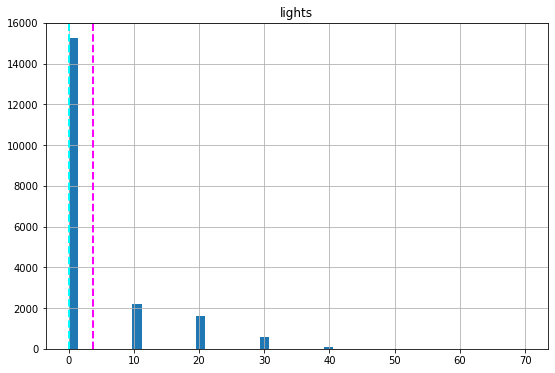

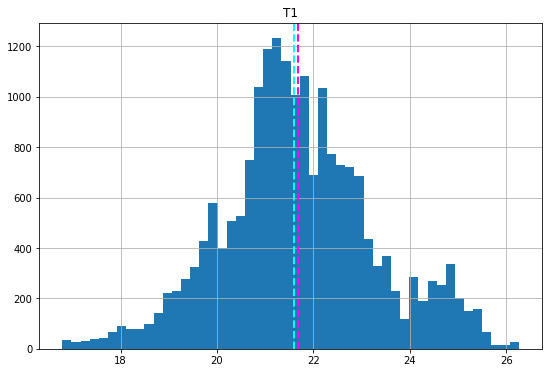

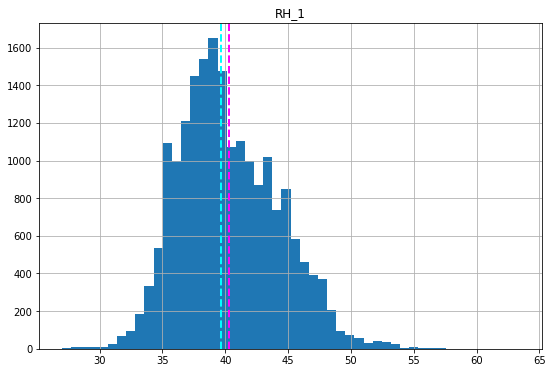

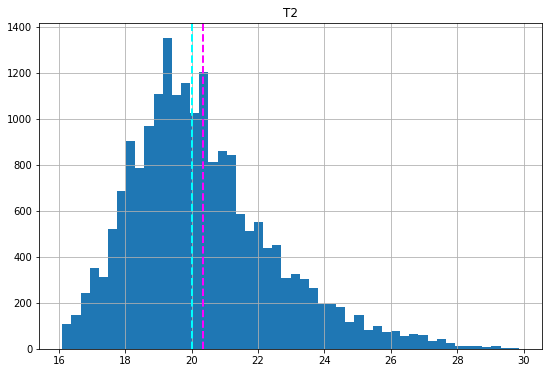

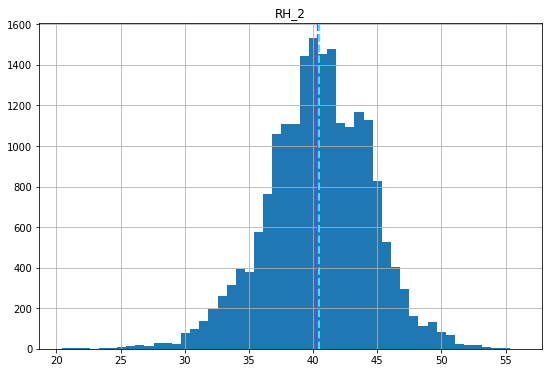

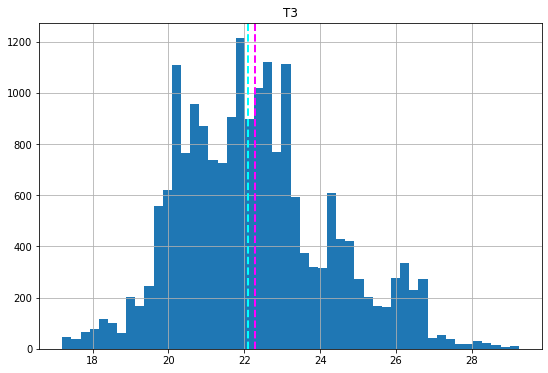

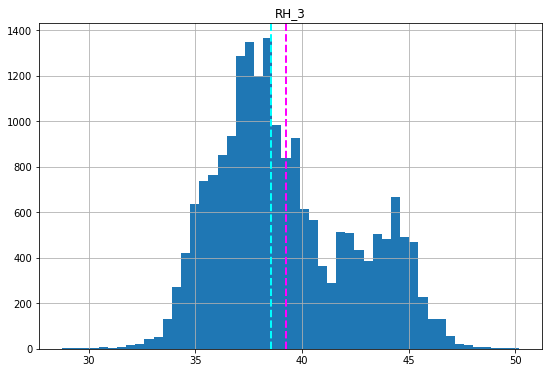

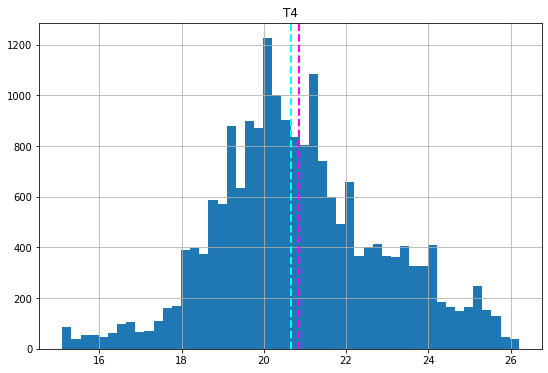

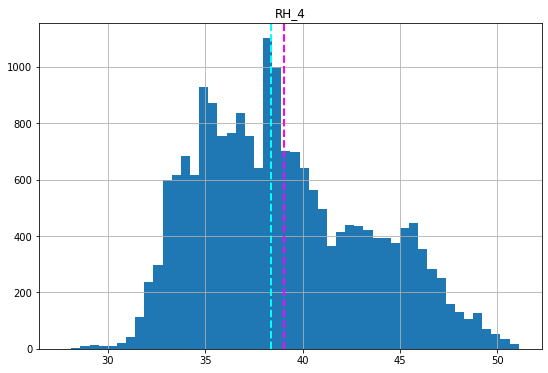

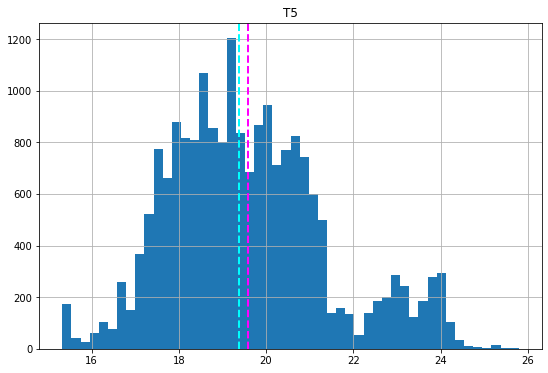

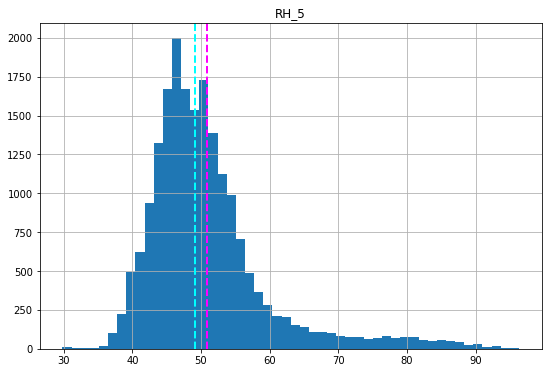

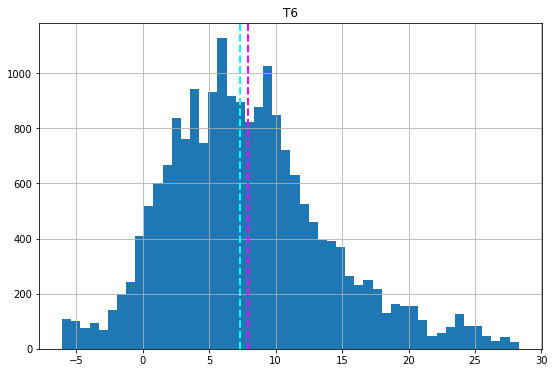

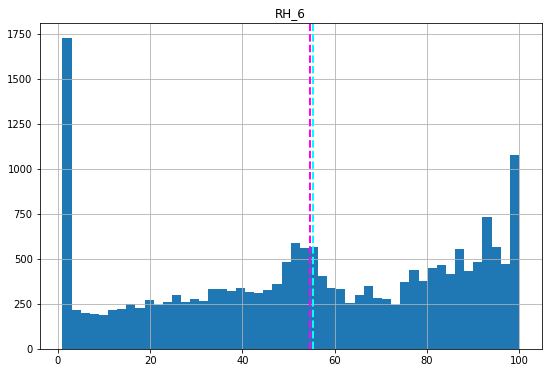

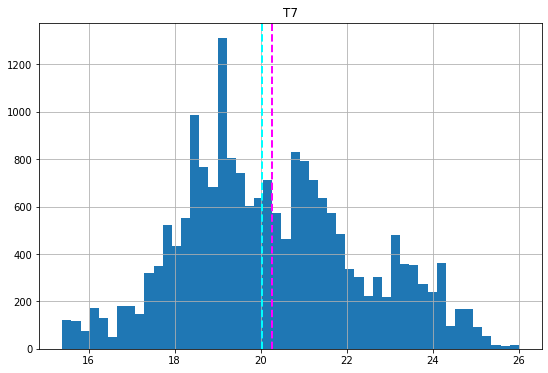

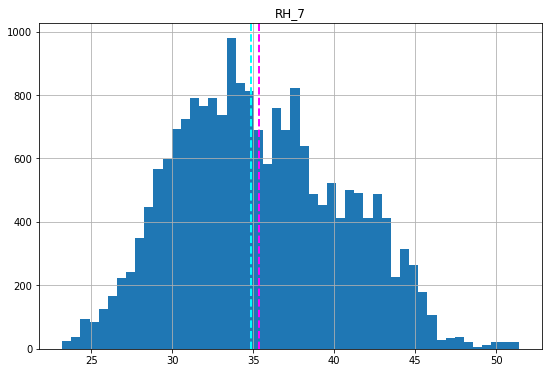

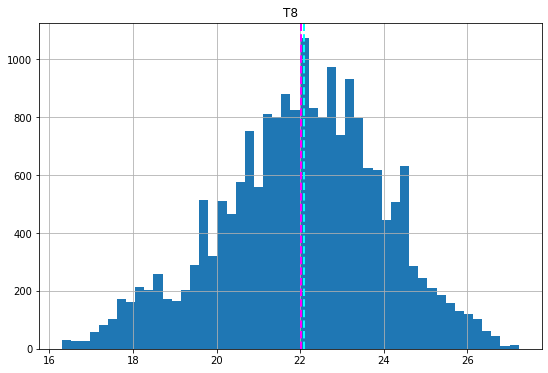

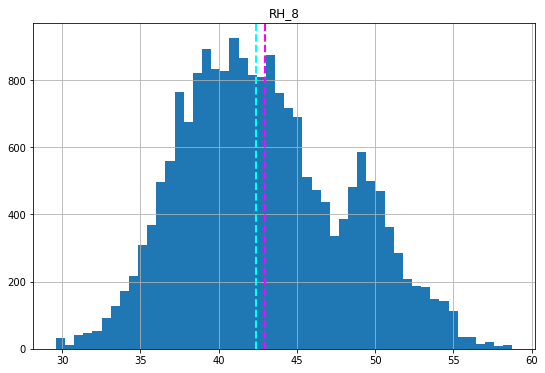

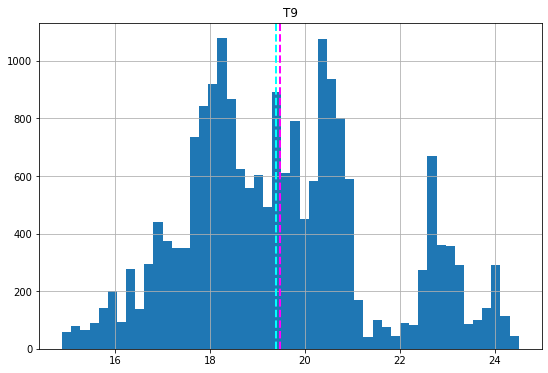

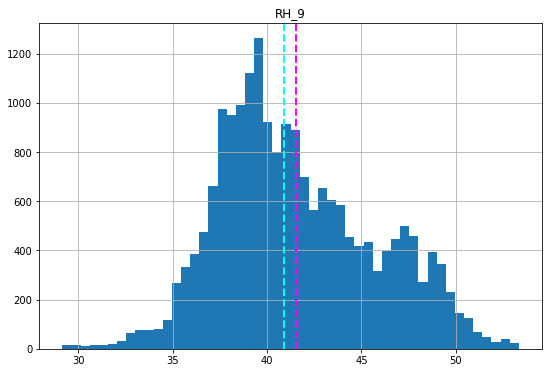

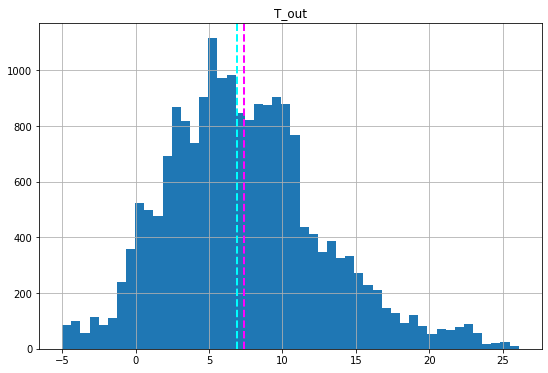

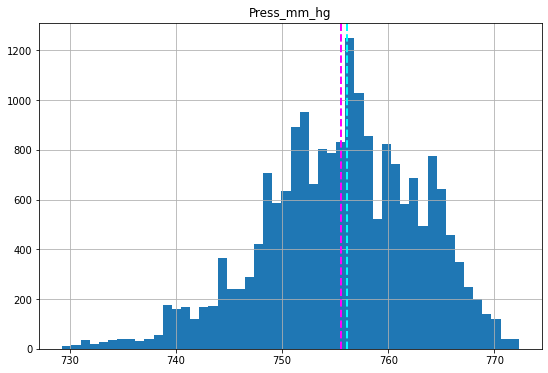

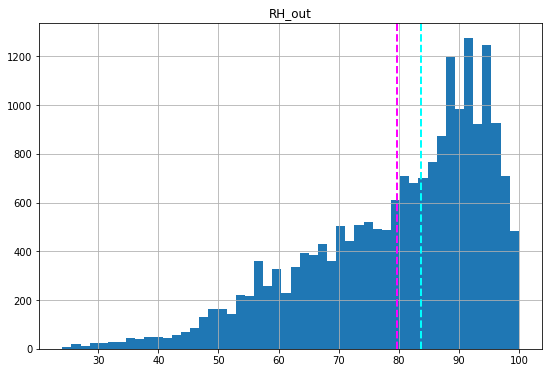

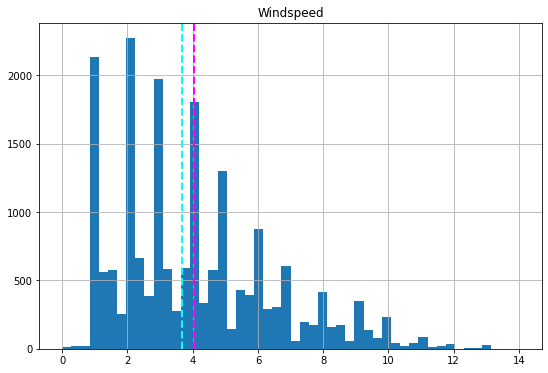

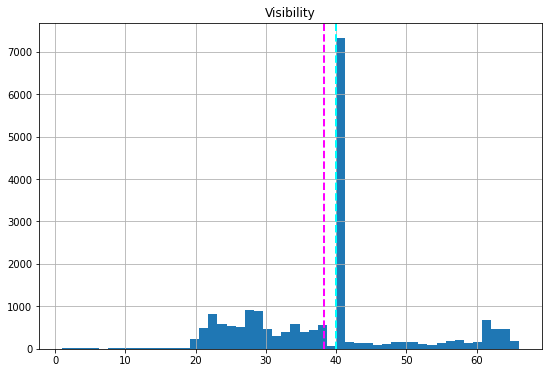

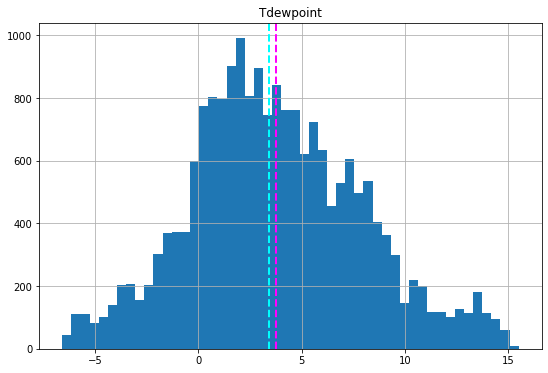

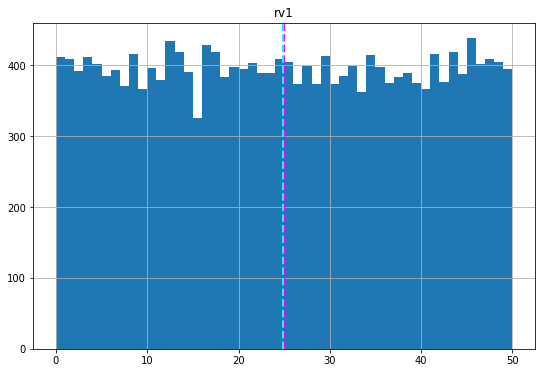

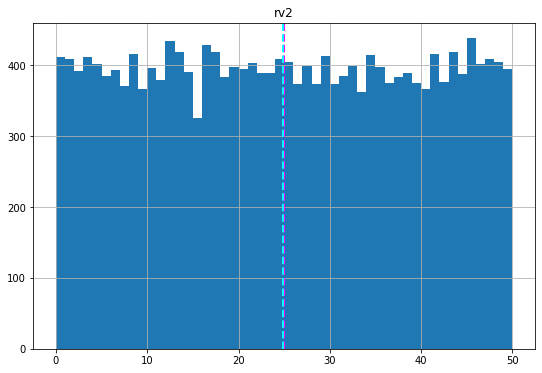

In [ ]:
# plot a bar plot for each numerical feature count 
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

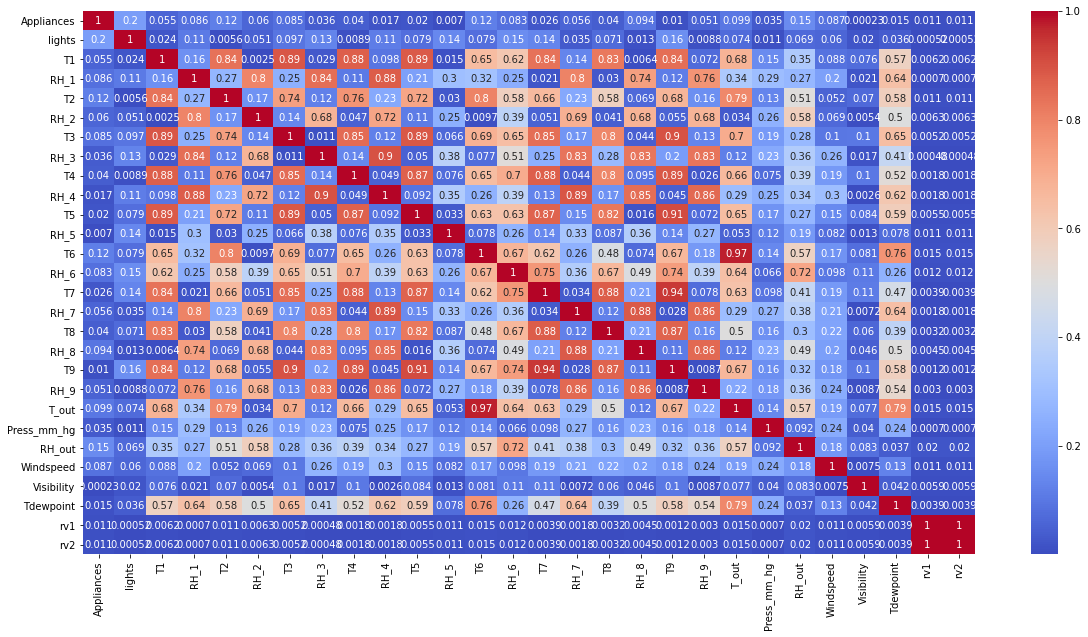

In [6]:
 ## Correlation
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [7]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [8]:
calc_vif(df[[i for i in df.describe().columns if i not in ['date','Appliances']]])

,variables,VIF
0,lights,1.579656
1,T1,3606.372780
2,RH_1,1645.937266
3,T2,2504.705964
4,RH_2,2171.386807
5,T3,1239.195636
6,RH_3,1567.913588
7,T4,1027.209161
8,RH_4,1394.037450
9,T5,1187.572121


# **Train test split**

In [ ]:
X = df.drop(columns=["Appliances","date"], axis=1)
y = df["Appliances"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
14358,0,21.290000,41.645000,23.666667,35.633333,22.033333,36.860000,22.290000,35.290000,19.700000,43.260000,11.047500,11.770000,20.057143,30.498571,21.200000,38.200000,20.290000,38.433333,8.700000,767.800000,72.000000,5.000000,40.000000,3.800000,21.836223,21.836223
12227,0,22.260000,41.530000,21.100000,41.163333,24.463333,37.260000,21.200000,41.060000,20.823333,45.233333,16.575000,10.240000,21.890000,36.360000,23.666667,40.230000,20.890000,43.590000,12.933333,751.250000,66.333333,3.833333,38.166667,6.816667,30.173128,30.173128
2846,10,21.033333,41.966667,20.500000,40.990000,20.600000,42.700000,20.356667,42.126667,17.500000,51.900000,6.866667,99.900000,16.914444,40.145000,19.390000,51.135000,16.790000,46.260000,6.200000,753.633333,92.666667,5.000000,40.000000,5.066667,48.973439,48.973439
7445,30,20.100000,38.530000,18.390000,39.363333,19.926667,37.566667,21.000000,36.730000,18.260000,43.626667,3.826667,81.590000,18.133333,32.863333,20.166667,41.500000,18.290000,41.933333,3.700000,744.850000,93.833333,5.000000,29.000000,2.766667,36.148127,36.148127
5016,10,20.260000,39.400000,19.200000,37.900000,21.290000,39.500000,19.200000,36.730000,17.600000,50.995000,6.000000,56.900000,19.700000,30.290000,21.066667,36.466667,18.000000,38.881667,5.000000,759.800000,62.000000,8.000000,40.000000,-1.700000,7.065021,7.065021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6864,10,19.790000,35.966667,18.000000,36.060000,20.200000,35.900000,18.666667,32.363333,17.434000,48.052000,0.466667,57.696667,19.254000,32.378000,20.633333,38.766667,18.000000,38.833333,0.600000,757.000000,73.000000,6.000000,23.000000,-3.700000,17.791981,17.791981
6700,0,19.890000,36.590000,18.000000,37.326667,20.390000,37.363333,19.100000,35.090000,18.452857,54.538571,-0.400000,70.226667,18.700000,36.194286,20.000000,43.900000,17.700000,41.000000,0.966667,749.966667,81.000000,3.666667,21.333333,-1.933333,36.850069,36.850069
9000,0,20.390000,35.090000,16.890000,39.900000,20.390000,37.090000,19.500000,33.900000,18.290000,49.590000,-0.483333,67.111111,21.290000,34.230000,22.700000,41.438889,19.290000,39.790000,-0.100000,768.400000,91.000000,3.000000,62.000000,-1.400000,47.018894,47.018894
10958,0,22.600000,37.000000,20.700000,38.330000,22.790000,37.045000,20.790000,39.290000,20.200000,46.245000,8.660000,44.526667,21.500000,32.730000,24.290000,39.490000,20.290000,39.500000,9.666667,749.966667,72.333333,6.333333,40.000000,4.866667,26.818892,26.818892


In [ ]:
y_train

14358     50
12227    100
2846      70
7445     130
5016     300
        ... 
6864      50
6700      50
9000      50
10958     90
3853      50
Name: Appliances, Length: 15788, dtype: int64

In [ ]:
reg.score(X, y)

0.16472779874802046

In [ ]:
reg.coef_

array([ 2.01013131e+00, -5.78112289e-01,  1.54368208e+01, -1.85252055e+01,
       -1.40009432e+01,  2.57132593e+01,  5.06380954e+00, -4.02370603e+00,
       -1.96061428e-01,  8.44658221e-01,  1.52405318e-01,  7.30031412e+00,
        2.89863141e-01,  8.19848046e-01, -1.40697043e+00,  8.56243287e+00,
       -4.89011100e+00, -1.54235664e+01, -8.92019389e-01, -1.05761745e+01,
        2.40630116e-01, -1.07611374e+00,  1.85243211e+00,  1.56302152e-01,
        5.34853763e+00, -9.57092885e-03, -9.57092885e-03])

In [ ]:
len(reg.coef_)

27

In [ ]:
reg.intercept_

-12.500650484239884

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([117.63499388,  60.01274507,  84.16000111, ..., 110.24431781,
       193.52156856,  81.77669116])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [ ]:
# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_lr = reg.predict(X_test)

r2_test_lr = r2_score(y_test, prediction_test_lr)
rms_test_lr = sqrt(mean_squared_error(y_test, prediction_test_lr))
mae_test_lr = mean_absolute_error(y_test,prediction_test_lr)
mape_test_lr = np.mean(np.abs((y_test - prediction_test_lr) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_lr = reg.predict(X_train)

r2_train_lr = r2_score(y_train, prediction_train_lr)
rms_train_lr = sqrt(mean_squared_error(y_train, prediction_train_lr))
mae_train_lr = mean_absolute_error(y_train,prediction_train_lr)
mape_train_lr = np.mean(np.abs((y_train - prediction_train_lr) / y_train)) * 100


In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_lr)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_lr)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_lr)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_lr)))
print('MAE for Training Data:',float("{0:.2f}".format(mae_train_lr)))
print('MAE for Testing Data:',float("{0:.2f}".format(mae_test_lr)))
print('MAPE for Training Data:',float("{0:.2f}".format(mape_train_lr)))
print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test_lr)))

R Squared for Training Data: 0.17
R Squared for Testing Data: 0.15
RMS for Training Data: 93.35
RMS for Testing Data: 95.08
MAE for Training Data: 52.6
MAE for Testing Data: 53.78
MAPE for Training Data: 60.62
MAPE for Testing Data: 61.75


# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([ 2.01013577e+00, -5.77663897e-01,  1.54367139e+01, -1.85247819e+01,
       -1.40006621e+01,  2.57128079e+01,  5.06364316e+00, -4.02362684e+00,
       -1.95968113e-01,  8.43902834e-01,  1.52416339e-01,  7.30001595e+00,
        2.89841274e-01,  8.19206968e-01, -1.40690960e+00,  8.56220042e+00,
       -4.89013076e+00, -1.54223622e+01, -8.92023802e-01, -1.05749022e+01,
        2.40623384e-01, -1.07590008e+00,  1.85243868e+00,  1.56300655e-01,
        5.34734622e+00, -1.91422515e-02, -0.00000000e+00])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -8757.62517771431


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso1 = lasso_regressor.predict(X_train)

In [ ]:
r2_test = r2_score(y_test, y_pred_lasso)
rms_test = sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_train = r2_score(y_train, y_pred_lasso1)
rms_train = sqrt(mean_squared_error(y_train, y_pred_lasso1))

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))

R Squared for Training Data: 0.17
R Squared for Testing Data: 0.15
RMS for Training Data: 93.35
RMS for Testing Data: 95.07


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -8762.061450602427


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge1 = ridge_regressor.predict(X_train)

In [ ]:
r2_test_ridge = r2_score(y_test, y_pred_ridge)
rms_test_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))

r2_train_ridge = r2_score(y_train, y_pred_ridge1)
rms_train_ridge = sqrt(mean_squared_error(y_train, y_pred_ridge1))

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_ridge)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_ridge)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_ridge)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_ridge)))

R Squared for Training Data: 0.17
R Squared for Testing Data: 0.15
RMS for Training Data: 93.35
RMS for Testing Data: 95.08


# **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.166249457400106

In [ ]:
y_pred_en = elasticnet.predict(X_test)
y_pred_en1 = elasticnet.predict(X_train)

In [ ]:
r2_test_en = r2_score(y_test, y_pred_en)
rms_test_en = sqrt(mean_squared_error(y_test, y_pred_en))

r2_train_en = r2_score(y_train, y_pred_en1)
rms_train_en = sqrt(mean_squared_error(y_train, y_pred_en1))

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_en)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_en)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_en)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_en)))

R Squared for Training Data: 0.17
R Squared for Testing Data: 0.15
RMS for Training Data: 93.43
RMS for Testing Data: 95.07


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -8758.389693156461


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred_elastic1 = elastic_regressor.predict(X_train)

In [ ]:
r2_test_p = r2_score(y_test, y_pred_elastic)
rms_test_p = sqrt(mean_squared_error(y_test, y_pred_elastic))

r2_train_q = r2_score(y_train, y_pred_elastic1)
rms_train_q = sqrt(mean_squared_error(y_train, y_pred_elastic1))

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_q)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_p)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_q)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_p)))

R Squared for Training Data: 0.17
R Squared for Testing Data: 0.15
RMS for Training Data: 93.35
RMS for Testing Data: 95.07


# **CONCLUSION**
1. Appliances is the dependent variable ie y
2. R2 for training data is 0.17
3. R2 for testing data is 0.15
4. RMS value for training data is 93.35
5. RMS value for testing data is 95.07
6. The model is not suitable, it get very less acuracy.
7. Uses of appliances are based on temperature, humidity and weather condition. 